# 이상치 탐지

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import time
import pickle
import gc

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# data load

In [2]:
df = pd.read_csv('../data/preprocessed/1_X_Y_preprocessed.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_53504/3340299679.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/1_X_Y_preprocessed.csv')


In [3]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test,시군구 번지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,0,서울특별시 강남구 개포동 658-1
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,0,서울특별시 강남구 개포동 658-1
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,0,서울특별시 강남구 개포동 658-1
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,0,서울특별시 강남구 개포동 658-1
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,0,서울특별시 강남구 개포동 658-1


In [8]:
tmp = df.groupby('계약년월')[['target']].mean()

In [10]:
tmp.reset_index(inplace=True)

In [11]:
tmp

,계약년월,target
0,200701,27907.070115
1,200702,28687.696452
2,200703,26188.014682
3,200704,29135.020486
4,200705,32721.145273
...,...,...
196,202305,108825.542857
197,202306,111110.622705
198,202307,NaN
199,202308,NaN


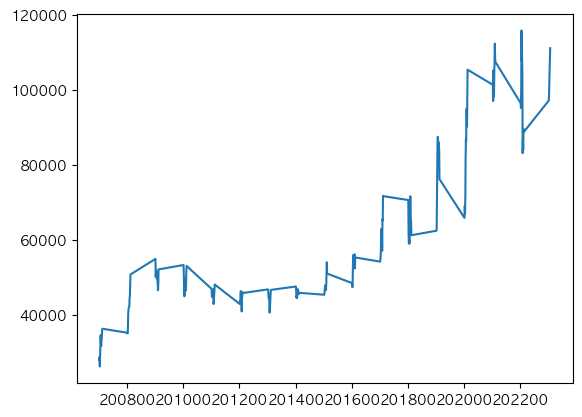

In [12]:
plt.plot(tmp.iloc[:198]['계약년월'], tmp.iloc[:198]['target'])